In [1]:
from PIL import Image
import os
import numpy as np
import seaborn as sns
from lib.crypto.csprng import *
from lib.util import *
from lib.crypto.aes import *
from random import random
import matplotlib.pyplot as plt
from scipy.stats import *

In [2]:
img = Image.open("../server/img/1.jpg").convert('L')

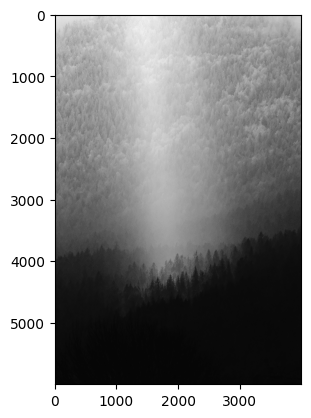

In [3]:
original = np.array(img)
data_bytes = original.tobytes()
plt.imshow(original, cmap='gray')

In [4]:
original.shape

(6000, 4000)

In [5]:
cnt = np.zeros(256)

for i in range(255):
  cnt[i] = np.count_nonzero(original == i)

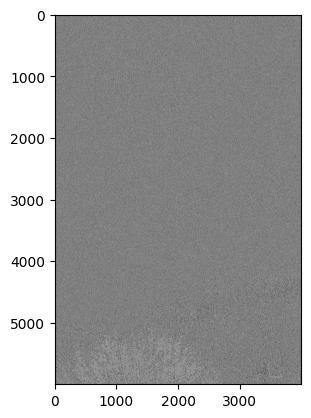

In [6]:
aes_key = os.urandom(16)

aes_enc = AES.new(aes_key, AES.MODE_ECB)
enc_aes_data = aes_enc.encrypt(pad(data_bytes, 16))

res = np.frombuffer(enc_aes_data[:original.shape[0] * original.shape[1]], dtype=np.uint8).reshape(original.shape)
plt.imshow(res, cmap='gray')

In [7]:
cnt = np.zeros(256)

for i in range(255):
  cnt[i] = np.count_nonzero(res == i)

In [8]:
chaos = SineHenonMap(random(), random(), random())

aes = DynamicAESEBC(chaos)
enc_caes_data = aes.encrypt(data_bytes)

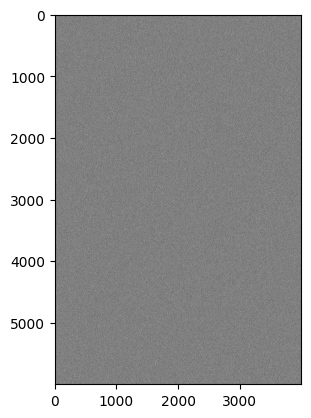

In [9]:
res = np.frombuffer(enc_caes_data[:res.shape[0] * res.shape[1]], dtype=np.uint8).reshape(res.shape)
plt.imshow(res, cmap='gray')

In [10]:
cnt = np.zeros(256)

for i in range(255):
  cnt[i] = np.count_nonzero(res == i)
